# Import necessary packages

In [3]:
# import pandas library for data management
# import Stanford Core NLP for data analisys
            
import pandas as pd
from pycorenlp import StanfordCoreNLP
import numpy as np
import util
import importlib
import nlp_util
import preprocessing

#java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 15000

In [4]:
importlib.reload(util)

<module 'util' from 'D:\\UIC\\Fall 2018\\Statistical NLP\\Project\\jurat-aldo-project\\cs-521-project.git\\source\\CS-521-PROJECT\\util.py'>

In [5]:
# Load all the files
tr_file, va_file, te_file = util.load_files()

In [6]:
tr_dict = util.tsv_to_dict(tsv_file=tr_file, columns=['Id','Label','Statement'])

In [93]:
tr_dict['statement'][0]

'Says the Annies List political group supports third-trimester abortions on demand.'

In [8]:
pos_tags, bigrams_pos, trigram_pos = preprocessing.extract_POS(statements=tr_dict['statement'])

NLP_Task ready to use.
Extracting POS Tags
Finished


## Labels

In [167]:
multiclass_labels =  np.array(preprocessing.create_multiclass_labels(labels=tr_dict['label'], 
                                                   label_values={'false':0, 'true':1,'pants-fire':2,'barely-true':3,'half-true':4,'mostly-true':5}))

In [188]:
binary_labels = np.array(preprocessing.create_multiclass_labels(labels=tr_dict['label'], 
                                                   label_values={'false':1, 'true':-1,'pants-fire':1,'barely-true':1,'half-true':0,'mostly-true':-1}))

# Word count

In [80]:
importlib.reload(nlp_util)
corenlp = nlp_util.NLP_Task()

NLP_Task ready to use.


In [87]:
words_count = preprocessing.word_counts(tr_dict['statement'])

NLP_Task ready to use.
Extracting tokens by sentences
Counting tokens
Finished


# Removing short statements

In [399]:
tr_dict['statement'][[i for i,x in enumerate(words_count) if x<5]]

array(['Crime is rising.', 'On abortion', 'On abortion',
       'On same-sex marriage.', 'On torture.', 'NASCAR endorsed Trump',
       'On disaster aid offsets', 'The countrys bankrupt.',
       'I was filibustered.', 'On reconciliation', 'On high-speed rail.',
       'On abortion rights.', 'Weve rebuilt China.',
       'On same-sex marriage', 'On transportation financing',
       'Onthe Iran nuclear deal', 'On bipartisan redistricting.',
       'On immigration reform', 'Were bankrupt.', 'On abortion.',
       'On torture.', 'On offshore drilling.', 'On gun policy',
       'On sequestration', 'On gay marriage', 'On Common Core.',
       'On switching parties.', 'On oil drilling', 'On raising taxes.',
       'On the coal industry'], dtype=object)

In [284]:
unigram_pos_list = list()
for pt in pos_tags:
    for x in pt:
        if x not in unigram_pos_list:
            unigram_pos_list.append(x)

In [332]:
bigram_pos_list = list()
for pt in bigrams_pos:
    for x in pt:
        if x not in bigram_pos_list:
            bigram_pos_list.append(x)

In [353]:
trigram_pos_list = list()
for pt in trigram_pos:
    for x in pt:
        if x not in trigram_pos_list:
            trigram_pos_list.append(x)

In [355]:
len(trigram_pos_list)

10685

# Vectors for POS tags

In [97]:
importlib.reload(preprocessing)

<module 'preprocessing' from 'D:\\UIC\\Fall 2018\\Statistical NLP\\Project\\jurat-aldo-project\\cs-521-project.git\\source\\CS-521-PROJECT\\preprocessing.py'>

In [253]:
unigram_tags_dictionary = np.array(['NN','NNP','PRP','PRP$','WP','DT','WDT','CD','RB','UH','VB','JJ','VBD','VBG','VBN','VBP','VBZ','JJR','JJS'])
bigram_tags_dictionary = np.array(['NNP NNP', 'IN DT', 'JJR IN', 'CD NNS', 'DT JJS', 'IN CD','CD NN','JJS NN', 'NNS IN','<s> VBZ','NN IN','TO VB'])
trigram_tags_dictionary = np.array(['NNP NNP NNP','CD NN IN','IN DT JJ','IN DT NN','VBZ NNP NNP','<s> NNP NNP','VBD IN CD','JJR IN CD','NN IN DT','NNS IN DT','DT JJ CD','<s> VBZ NNP'])

In [388]:
X_tr_uni_1hot, X_tr_uni_freq = preprocessing.pos_vectors(pos_tags=pos_tags,vector_dictionary=unigram_pos_list)
#X_tr_bi_1hot, X_tr_bi_freq =  preprocessing.pos_vectors(pos_tags=bigrams_pos,vector_dictionary=bigram_pos_list)
#X_tr_tri_1hot, X_tr_tri_freq =  preprocessing.pos_vectors(pos_tags=trigram_pos,vector_dictionary=trigram_pos_list[:100])

#,'DESDE ACA NO','JJR IN $','TO VB JJ','CD NNS IN','NNP CC NNP','VBP CD NN'])

Processing POS tags and creating vectors
Finished


In [379]:
X_tr_tri_1hot, X_tr_tri_freq =  preprocessing.pos_vectors(pos_tags=trigram_pos,vector_dictionary=trigram_pos_list)

Processing POS tags and creating vectors
Finished


### Load Validation File

In [ ]:
#va_dict = util.tsv_to_dict(tsv_file=va_file, columns=['Id','Label','Statement'])
#va_pos_tags, va_bigrams_pos, va_trigram_pos = preprocessing.extract_POS(statements=va_dict['statement'])

### Extract vectors from validation data

In [387]:
X_va_uni_1hot, X_va_uni_freq = preprocessing.pos_vectors(pos_tags=va_pos_tags,vector_dictionary=unigram_pos_list)
#X_va_bi_1hot, X_va_bi_freq =  preprocessing.pos_vectors(pos_tags=va_bigrams_pos,vector_dictionary=bigram_pos_list)
#X_va_tri_1hot, X_va_tri_freq =  preprocessing.pos_vectors(pos_tags=va_trigram_pos,vector_dictionary=trigram_pos_list[:100])

Processing POS tags and creating vectors
Finished


In [378]:
X_va_tri_1hot, X_va_tri_freq =  preprocessing.pos_vectors(pos_tags=va_trigram_pos,vector_dictionary=trigram_pos_list)

Processing POS tags and creating vectors
Finished


In [247]:
va_multiclass_labels =  np.array(preprocessing.create_multiclass_labels(labels=va_dict['label'], 
                                                   label_values={'false':0, 'true':1,'pants-fire':2,'barely-true':3,'half-true':4,'mostly-true':5}))
va_binary_labels = np.array(preprocessing.create_multiclass_labels(labels=va_dict['label'], 
                                                   label_values={'false':1, 'true':-1,'pants-fire':1,'barely-true':1,'half-true':0,'mostly-true':-1}))

# Feature selection

In [ ]:
from sklearn.feature_selection import mutual_info_classif

ordered_list = list()
for i,x in enumerate(mutual_info_classif(X_tr_uni_1hot[binary_indexes], binary_labels[binary_indexes], discrete_features=True, n_neighbors=3)):
    ordered_list.append((x, unigram_pos_list[i]))

"""
array([(-7.77156117e-16, '<s>'), ( 2.13717109e-06, 'WP'),
       ( 4.06478963e-06, '#'), ( 4.06478963e-06, 'WP$'),
       ( 1.67234016e-05, 'WRB'), ( 2.16191664e-05, 'POS'),
       ( 2.72868487e-05, 'PRP$'), ( 3.79124779e-05, "''"),
       ( 4.18650646e-05, 'PRP'), ( 4.45388858e-05, 'EX'),
       ( 6.67293225e-05, '$'), ( 6.76391536e-05, '``'),
       ( 7.22643123e-05, '-LRB-'), ( 7.78119036e-05, '-RRB-'),
       ( 9.01529346e-05, 'WDT'), ( 1.23952702e-04, 'FW'),
       ( 1.35540009e-04, 'PDT'), ( 1.54593396e-04, 'RBS'),
       ( 1.89525521e-04, 'NNPS'), ( 1.97830808e-04, 'LS'),
       ( 1.97830808e-04, 'SYM'), ( 2.12225346e-04, ':'),
       ( 2.69732834e-04, 'RP'), ( 3.20721118e-04, '.'),
       ( 3.56727983e-04, 'UH'), ( 3.60467632e-04, 'CC'),
       ( 3.97228097e-04, 'VBD'), ( 4.39682260e-04, 'VBN'),
       ( 5.91959326e-04, 'VBZ'), ( 6.66656144e-04, 'NNS'),
       ( 6.97559161e-04, 'RBR'), ( 7.86715301e-04, 'NN'),
       ( 8.00394259e-04, ','), ( 9.51078591e-04, 'DT'),
       ( 9.97657770e-04, 'JJ'), ( 1.21401055e-03, 'MD'),
       ( 1.61441533e-03, 'VBG'), ( 1.65879984e-03, 'RB'),
       ( 1.93145646e-03, 'TO'), ( 2.35175393e-03, 'VBP'),
       ( 2.63057262e-03, 'IN'), ( 2.95824876e-03, 'NNP'),
       ( 3.59556896e-03, 'JJS'), ( 3.84586408e-03, 'VB'),
       ( 5.39358278e-03, 'JJR'), ( 8.03755857e-03, 'CD')],
      dtype=[('m', '<f8'), ('label', '<U5')])
"""
selected_unigrams = list()
for ep in (np.flip(np.sort(np.array(ordered_list, dtype=[('m',float),('label','U5')]),order='m'))):
    selected_unigrams.append(ep[1])
selected_unigrams[:13]

In [393]:
selected_unigrams[:13]

['CD',
 'JJR',
 'VB',
 'JJS',
 'NNP',
 'IN',
 'VBP',
 'TO',
 'RB',
 'VBG',
 'MD',
 'JJ',
 'DT']

In [394]:
ordered_list = list()
for i,x in enumerate(mutual_info_classif(X_tr_uni_freq[binary_indexes], binary_labels[binary_indexes], discrete_features=True, n_neighbors=3)):
    ordered_list.append((x, unigram_pos_list[i]))


"""
selected_unigrams = list()
for ep in (np.flip(np.sort(np.array(ordered_list, dtype=[('m',float),('label','U5')]),order='m'))):
    selected_unigrams.append(ep[1])
selected_unigrams[:13]
"""
selected_freq_unigram = list()
for ep in (np.flip(np.sort(np.array(ordered_list, dtype=[('m',float),('label','U10')]),order='m'))):
    selected_freq_unigram.append(ep[1])
selected_freq_unigram

['CD',
 'NNP',
 'IN',
 'JJR',
 'VB',
 'JJS',
 'NN',
 'DT',
 'TO',
 'VBP',
 'RB',
 ',',
 'VBG',
 'JJ',
 '.',
 'MD',
 'NNS',
 'RBR',
 '<s>',
 'VBN',
 'VBD',
 'CC',
 'VBZ',
 'EX',
 ':',
 '$',
 'NNPS',
 'UH',
 'RP',
 'RBS',
 'PRP',
 '-RRB-',
 'WDT',
 '``',
 '-LRB-',
 'PRP$',
 'FW',
 'SYM',
 'LS',
 "''",
 'PDT',
 'WRB',
 'WP',
 'POS',
 'WP$',
 '#']

In [351]:
ordered_list = list()
for i,x in enumerate(mutual_info_classif(X_tr_bi_1hot[binary_indexes], binary_labels[binary_indexes], discrete_features=True, n_neighbors=3)):
    ordered_list.append((x, bigram_pos_list[i]))
selected_bigrams = list()
for ep in (np.flip(np.sort(np.array(ordered_list, dtype=[('m',float),('label','U15')]),order='m'))):
    selected_bigrams.append(ep[1])
selected_bigrams[:7]
"""
['NNP NNP', 'IN DT', 'JJR IN', 'CD NN', 'IN CD', 'CD NNS', 'DT JJS']
"""

['NNP NNP', 'IN DT', 'JJR IN', 'CD NN', 'IN CD', 'CD NNS', 'DT JJS']

In [380]:
ordered_list = list()
for i,x in enumerate(mutual_info_classif(X_tr_tri_1hot[binary_indexes], binary_labels[binary_indexes], discrete_features=True, n_neighbors=3)):
    ordered_list.append((x, trigram_pos_list[i]))
    #print(x,trigram_pos_list[i])
selected_trigrams = list()
for ep in (np.flip(np.sort(np.array(ordered_list, dtype=[('m',float),('label','U20')]),order='m'))):
    selected_trigrams.append(ep[1])
selected_trigrams[:11]
"""
['NNP NNP NNP',
 'CD NN IN',
 'VBZ NNP NNP',
 'IN DT NN',
 'IN DT JJ',
 'NN IN DT',
 '<s> VBZ NNP',
 'JJR IN CD',
 'NNP NNP VBD',
 'DT JJ CD',
 'NNS IN DT']
"""

['NNP NNP NNP',
 'CD NN IN',
 'VBZ NNP NNP',
 'IN DT NN',
 'IN DT JJ',
 'NN IN DT',
 '<s> VBZ NNP',
 'JJR IN CD',
 'NNP NNP VBD',
 'DT JJ CD',
 'NNS IN DT']

# Training Models with POS Tags

###  Majority for Multiclassification

In [189]:
importlib.reload(util)

<module 'util' from 'D:\\UIC\\Fall 2018\\Statistical NLP\\Project\\jurat-aldo-project\\cs-521-project.git\\source\\CS-521-PROJECT\\util.py'>

In [190]:
majority = np.full(va_multiclass_labels.shape, util.mode(multiclass_labels))
np.mean(majority == va_multiclass_labels)

0.19314641744548286

###  Majority for Multiclassification with 3 labels

In [258]:
majority = np.full(va_binary_labels.shape, util.mode(binary_labels))
np.mean(majority == va_binary_labels)

0.4797507788161994

### Majority for binary classification

In [259]:
binary_indexes = [i for i,x in enumerate(binary_labels) if x!=0]
va_binary_indexes = np.array([i for i,x in enumerate(va_binary_labels) if x!=0])

majority = np.full(va_binary_labels[va_binary_indexes].shape, util.mode(binary_labels[binary_indexes]))
np.mean(majority == va_binary_labels[va_binary_indexes])

0.5945945945945946

### DT Classifier

In [260]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

### Multiclass labels
'false':0, 'true':1,'pants-fire':2,'barely-true':3,'half-true':4,'mostly-true':5

### Unigrams

# Using 1hot vectors

In [331]:
#for i in range(1,len(selected_unigrams)):
#print("Using {0} Features".format(i))
X_tr_uni_1hot, X_tr_uni_freq = preprocessing.pos_vectors(pos_tags=pos_tags,vector_dictionary=selected_unigrams[:13])
X_va_uni_1hot, X_va_uni_freq = preprocessing.pos_vectors(pos_tags=va_pos_tags,vector_dictionary=selected_unigrams[:13])
#for depth in range(1,10):
#    print(depth)
m_clf = DecisionTreeClassifier(max_depth=5, criterion='entropy')
m_clf.fit(X_tr_uni_1hot, multiclass_labels)
predicted = m_clf.predict(X_va_uni_1hot)
print(m_clf.score(X=X_va_uni_1hot, y=va_multiclass_labels))
print(cross_val_score(m_clf, X_va_uni_1hot, va_multiclass_labels, cv=10))
    
"""
using all features
3
0.2398753894080997
[0.19847328 0.29230769 0.19230769 0.27131783 0.17054264 0.2248062
 0.234375   0.26771654 0.24603175 0.256     ]
 
 With feature selection using MI
 5
0.2507788161993769
[0.17557252 0.23076923 0.16923077 0.27906977 0.1627907  0.21705426
 0.2734375  0.21259843 0.25396825 0.248     ]
"""

Processing POS tags and creating vectors
Finished
Processing POS tags and creating vectors
Finished
0.2507788161993769
[0.17557252 0.23076923 0.16923077 0.27906977 0.1627907  0.21705426
 0.2734375  0.21259843 0.25396825 0.248     ]


'\nusing all features\n3\n0.2398753894080997\n[0.19847328 0.29230769 0.19230769 0.27131783 0.17054264 0.2248062\n 0.234375   0.26771654 0.24603175 0.256     ]\n \n With feature selection using MI\n 5\n0.2507788161993769\n[0.17557252 0.23076923 0.16923077 0.27906977 0.1627907  0.21705426\n 0.2734375  0.21259843 0.25396825 0.248     ]\n'

# Using frequency vectors

In [382]:
#for depth in range(1,10):
#print(depth)
m_clf = DecisionTreeClassifier(max_depth=4, criterion='entropy')
m_clf.fit(X_tr_uni_freq, multiclass_labels)
predicted = m_clf.predict(X_va_uni_freq)
print(m_clf.score(X=X_va_uni_freq, y=va_multiclass_labels))
print(cross_val_score(m_clf, X_va_uni_freq, va_multiclass_labels, cv=10))

0.23052959501557632
[0.22137405 0.21538462 0.16923077 0.24806202 0.21705426 0.23255814
 0.21875    0.22047244 0.24603175 0.224     ]


### Bigrams

# Using 1hot vectors

In [203]:
#for depth in range(1,10):
#print(depth)
m_clf = DecisionTreeClassifier(max_depth=5, criterion='entropy')
m_clf.fit(X_tr_bi_1hot, multiclass_labels)
predicted = m_clf.predict(X_va_bi_1hot)
print(m_clf.score(X=X_va_bi_1hot, y=va_multiclass_labels))
print(cross_val_score(m_clf, X_va_bi_1hot, va_multiclass_labels, cv=10))

0.23753894080996885
[0.19847328 0.23846154 0.20769231 0.25581395 0.20930233 0.20930233
 0.3203125  0.22834646 0.23015873 0.232     ]


# Using frequency vectors

In [224]:
#for depth in range(1,10):
#print(depth)
m_clf = DecisionTreeClassifier(max_depth=5, criterion='entropy')
m_clf.fit(X_tr_bi_freq, multiclass_labels)
predicted = m_clf.predict(X_va_bi_freq)
print(m_clf.score(X=X_va_bi_freq, y=va_multiclass_labels))
print(cross_val_score(m_clf, X_va_bi_freq, va_multiclass_labels, cv=10))

0.23442367601246106
[0.20610687 0.22307692 0.24615385 0.23255814 0.21705426 0.23255814
 0.2421875  0.24409449 0.25396825 0.208     ]


### Trigrams

# Using 1hot vectors

In [205]:
#for depth in range(1,10):
#print(depth)
m_clf = DecisionTreeClassifier(max_depth=5, criterion='entropy')
m_clf.fit(X_tr_tri_1hot, multiclass_labels)
predicted = m_clf.predict(X_va_tri_1hot)
print(m_clf.score(X=X_va_tri_1hot, y=va_multiclass_labels))
print(cross_val_score(m_clf, X_va_tri_1hot, va_multiclass_labels, cv=10))

0.2398753894080997
[0.20610687 0.26153846 0.19230769 0.26356589 0.2248062  0.20930233
 0.15625    0.20472441 0.16666667 0.192     ]


# Using frequency vectors

In [226]:
#for depth in range(1,10):
#print(depth)
m_clf = DecisionTreeClassifier(max_depth=5, criterion='entropy')
m_clf.fit(X_tr_tri_freq, multiclass_labels)
predicted = m_clf.predict(X_va_tri_freq)
print(m_clf.score(X=X_va_tri_freq, y=va_multiclass_labels))
print(cross_val_score(m_clf, X_va_tri_freq, va_multiclass_labels, cv=10))

0.2383177570093458
[0.19083969 0.23076923 0.22307692 0.26356589 0.2248062  0.20930233
 0.1796875  0.20472441 0.16666667 0.192     ]


# Grouping mostly false, mostly true and half-true labels

### Unigrams

# Using 1hot vectors

In [318]:
for depth in range(1,10):
    print(depth)
    m_clf = DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    m_clf.fit(X_tr_uni_1hot, binary_labels)
    predicted = m_clf.predict(X_va_uni_1hot)
    print(m_clf.score(X=X_va_uni_1hot, y=va_binary_labels))
    print(cross_val_score(m_clf, X_va_uni_1hot, va_binary_labels, cv=10))

"""3
0.5101246105919003
[0.46511628 0.48062016 0.50387597 0.48062016 0.46511628 0.49612403
 0.5078125  0.453125   0.48031496 0.52755906]
 
 After feature selection
 3
0.5101246105919003
[0.46511628 0.50387597 0.50387597 0.48837209 0.46511628 0.51937984
 0.5078125  0.4609375  0.47244094 0.51968504]
 """

1
0.4742990654205608
[0.47286822 0.48062016 0.42635659 0.48062016 0.42635659 0.40310078
 0.4765625  0.4453125  0.48031496 0.48031496]
2
0.4945482866043614
[0.47286822 0.45736434 0.46511628 0.48837209 0.48062016 0.48062016
 0.4921875  0.4609375  0.49606299 0.52755906]
3
0.5101246105919003
[0.46511628 0.50387597 0.50387597 0.48837209 0.46511628 0.51937984
 0.5078125  0.4609375  0.47244094 0.51968504]
4
0.5031152647975078
[0.45736434 0.50387597 0.51162791 0.47286822 0.46511628 0.51937984
 0.5546875  0.4296875  0.48818898 0.51968504]
5
0.5093457943925234
[0.49612403 0.52713178 0.51937984 0.52713178 0.46511628 0.51937984
 0.578125   0.4453125  0.54330709 0.54330709]
6
0.5007788161993769
[0.51162791 0.48062016 0.53488372 0.50387597 0.46511628 0.44186047
 0.5546875  0.4375     0.44094488 0.50393701]
7
0.4968847352024922
[0.47286822 0.51162791 0.48062016 0.50387597 0.48062016 0.47286822
 0.5625     0.4609375  0.47244094 0.49606299]
8
0.4883177570093458
[0.48062016 0.41860465 0.47286822 0.48837

'3\n0.5101246105919003\n[0.46511628 0.48062016 0.50387597 0.48062016 0.46511628 0.49612403\n 0.5078125  0.453125   0.48031496 0.52755906]\n \n After feature selection\n 3\n0.5101246105919003\n[0.46511628 0.50387597 0.50387597 0.48837209 0.46511628 0.51937984\n 0.5078125  0.4609375  0.47244094 0.51968504]\n '

# Using frequency vectors

In [228]:
#for depth in range(1,10):
#print(depth)
m_clf = DecisionTreeClassifier(max_depth=5, criterion='entropy')
m_clf.fit(X_tr_uni_freq, binary_labels)
predicted = m_clf.predict(X_va_uni_freq)
print(m_clf.score(X=X_va_uni_freq, y=va_binary_labels))
print(cross_val_score(m_clf, X_va_uni_freq, va_binary_labels, cv=10))

0.5062305295950156
[0.43410853 0.43410853 0.49612403 0.43410853 0.47286822 0.44186047
 0.5        0.4453125  0.50393701 0.48818898]


### Bigrams

# Using 1hot vectors

In [208]:
#for depth in range(1,10):
#print(depth)
m_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
m_clf.fit(X_tr_bi_1hot, binary_labels)
predicted = m_clf.predict(X_va_bi_1hot)
print(m_clf.score(X=X_va_bi_1hot, y=va_binary_labels))
print(cross_val_score(m_clf, X_va_bi_1hot, va_binary_labels, cv=10))

0.4945482866043614
[0.48837209 0.54263566 0.4496124  0.51937984 0.48837209 0.4496124
 0.53125    0.453125   0.48031496 0.49606299]


# Using frequency vectors

In [230]:
#for depth in range(1,10):
#print(depth)
m_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
m_clf.fit(X_tr_bi_freq, binary_labels)
predicted = m_clf.predict(X_va_bi_freq)
print(m_clf.score(X=X_va_bi_freq, y=va_binary_labels))
print(cross_val_score(m_clf, X_va_bi_freq, va_binary_labels, cv=10))

0.4945482866043614
[0.48837209 0.53488372 0.4496124  0.51162791 0.48837209 0.4496124
 0.53125    0.453125   0.48031496 0.49606299]


### Trigrams

# Using 1hot vectors

In [212]:
#for depth in range(1,10):
#print(depth)
m_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
m_clf.fit(X_tr_tri_1hot, binary_labels)
predicted = m_clf.predict(X_va_tri_1hot)
print(m_clf.score(X=X_va_tri_1hot, y=va_binary_labels))
print(cross_val_score(m_clf, X_va_tri_1hot, va_binary_labels, cv=10))

0.48909657320872274
[0.48837209 0.48062016 0.48062016 0.49612403 0.47286822 0.45736434
 0.46875    0.453125   0.49606299 0.46456693]


# Using frequency vectors

In [232]:
#for depth in range(1,10):
#print(depth)
m_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
m_clf.fit(X_tr_tri_freq, binary_labels)
predicted = m_clf.predict(X_va_tri_freq)
print(m_clf.score(X=X_va_tri_freq, y=va_binary_labels))
print(cross_val_score(m_clf, X_va_tri_freq, va_binary_labels, cv=10))

0.48909657320872274
[0.48837209 0.48062016 0.48062016 0.49612403 0.47286822 0.45736434
 0.46875    0.453125   0.49606299 0.46456693]


# Removing half-true labels and performing a pure binary classification

### Unigrams

In [413]:
binary_indexes = [i for i,x in enumerate(binary_labels) if x!=0]
w_count_indexes = [i for i,x in enumerate(words_count) if x<8]
binary_indexes = [x for x in binary_indexes if x not in w_count_indexes]

# Using 1hot vectors

In [414]:
#binary_indexes = [i for i,x in enumerate(binary_labels) if x!=0]
va_binary_indexes = [i for i,x in enumerate(va_binary_labels) if x!=0]
#for i in range(7,len(selected_unigrams)):
#    print("Using {0} Features".format(i))
X_tr_uni_1hot, X_tr_uni_freq = preprocessing.pos_vectors(pos_tags=pos_tags,vector_dictionary=selected_unigrams[:6])
X_va_uni_1hot, X_va_uni_freq = preprocessing.pos_vectors(pos_tags=va_pos_tags,vector_dictionary=selected_unigrams[:6])

#for depth in range(1,10):
#print(depth)
m_clf = DecisionTreeClassifier(max_depth=5, criterion='entropy')
m_clf.fit(X_tr_uni_1hot[binary_indexes], binary_labels[binary_indexes])
predicted = m_clf.predict(X_va_uni_1hot[va_binary_indexes])
print(m_clf.score(X=X_va_uni_1hot[va_binary_indexes], y=va_binary_labels[va_binary_indexes]))
print(cross_val_score(m_clf, X_va_uni_1hot[va_binary_indexes], va_binary_labels[va_binary_indexes], cv=10))
"""
5
0.6274131274131274
[0.53846154 0.59615385 0.56730769 0.61538462 0.60576923 0.58653846
 0.66990291 0.55339806 0.61165049 0.67961165]
 
6
0.6293436293436293
[0.60576923 0.60576923 0.63461538 0.67307692 0.60576923 0.56730769
 0.68932039 0.59223301 0.66990291 0.6407767 ]
 
Using [0:6 features]
5
0.640926640926641
[0.59615385 0.64423077 0.65384615 0.64423077 0.61538462 0.59615385
 0.70873786 0.5631068  0.60194175 0.66990291]
"""

Processing POS tags and creating vectors
Finished
Processing POS tags and creating vectors
Finished
0.640926640926641
[0.59615385 0.64423077 0.65384615 0.64423077 0.61538462 0.59615385
 0.70873786 0.5631068  0.60194175 0.66990291]


'\n5\n0.6274131274131274\n[0.53846154 0.59615385 0.56730769 0.61538462 0.60576923 0.58653846\n 0.66990291 0.55339806 0.61165049 0.67961165]\n \n6\n0.6293436293436293\n[0.60576923 0.60576923 0.63461538 0.67307692 0.60576923 0.56730769\n 0.68932039 0.59223301 0.66990291 0.6407767 ]\n \nUsing [0:6 features]\n5\n0.640926640926641\n[0.59615385 0.64423077 0.65384615 0.64423077 0.61538462 0.59615385\n 0.70873786 0.5631068  0.60194175 0.66990291]\n'

# Using frequency vectors

In [397]:
binary_indexes = [i for i,x in enumerate(binary_labels) if x!=0]
va_binary_indexes = [i for i,x in enumerate(va_binary_labels) if x!=0]
for i in range(1,len(selected_freq_unigram)):
    print("Using {0} Features".format(i))
    a, X_tr_uni_freq = preprocessing.pos_vectors(pos_tags=pos_tags,vector_dictionary=selected_freq_unigram[:i])
    a, X_va_uni_freq = preprocessing.pos_vectors(pos_tags=va_pos_tags,vector_dictionary=selected_freq_unigram[:i])
    #X_tr_uni_freq = (X_tr_uni_freq - X_tr_uni_freq.min())/(X_tr_uni_freq.max()-X_tr_uni_freq.min())
    #X_va_uni_freq = (X_va_uni_freq - X_tr_uni_freq.min())/(X_tr_uni_freq.max()-X_tr_uni_freq.min())
    for depth in range(1,10):
        print(depth)
        m_clf = DecisionTreeClassifier(max_depth=depth, criterion='entropy')
        m_clf.fit(X_tr_uni_freq[binary_indexes], binary_labels[binary_indexes])
        predicted = m_clf.predict(X_va_uni_freq[va_binary_indexes])
        print('s',m_clf.score(X=X_va_uni_freq[va_binary_indexes], y=va_binary_labels[va_binary_indexes]))
        print(cross_val_score(m_clf, X_va_uni_freq[va_binary_indexes], va_binary_labels[va_binary_indexes], cv=10))
    
"""
4
0.6322393822393823
[0.59615385 0.56730769 0.54807692 0.61538462 0.65384615 0.61538462
 0.67961165 0.55339806 0.57281553 0.65048544]
"""

Using 1 Features
Processing POS tags and creating vectors
Finished
Processing POS tags and creating vectors
Finished
1
s 0.5878378378378378
[0.59615385 0.59615385 0.52884615 0.59615385 0.52884615 0.5
 0.59223301 0.59223301 0.59223301 0.59223301]
2
s 0.5878378378378378
[0.59615385 0.61538462 0.57692308 0.60576923 0.59615385 0.58653846
 0.63106796 0.57281553 0.61165049 0.59223301]
3
s 0.5878378378378378
[0.63461538 0.61538462 0.57692308 0.60576923 0.63461538 0.58653846
 0.63106796 0.57281553 0.61165049 0.63106796]
4
s 0.5878378378378378
[0.63461538 0.61538462 0.57692308 0.60576923 0.63461538 0.58653846
 0.61165049 0.57281553 0.61165049 0.63106796]
5
s 0.5878378378378378
[0.63461538 0.61538462 0.57692308 0.60576923 0.63461538 0.58653846
 0.61165049 0.57281553 0.61165049 0.63106796]
6
s 0.5878378378378378
[0.63461538 0.61538462 0.57692308 0.60576923 0.63461538 0.58653846
 0.61165049 0.57281553 0.61165049 0.63106796]
7
s 0.5878378378378378
[0.63461538 0.61538462 0.57692308 0.60576923 0.6346

[0.58653846 0.52884615 0.47115385 0.625      0.61538462 0.59615385
 0.66019417 0.54368932 0.61165049 0.68932039]
9
s 0.6254826254826255
[0.58653846 0.5        0.43269231 0.60576923 0.52884615 0.52884615
 0.63106796 0.57281553 0.59223301 0.65048544]
Using 8 Features
Processing POS tags and creating vectors
Finished
Processing POS tags and creating vectors
Finished
1
s 0.5878378378378378
[0.58653846 0.59615385 0.52884615 0.59615385 0.52884615 0.5
 0.59223301 0.55339806 0.59223301 0.59223301]
2
s 0.6081081081081081
[0.58653846 0.56730769 0.61538462 0.625      0.60576923 0.60576923
 0.62135922 0.55339806 0.58252427 0.6407767 ]
3
s 0.6225868725868726
[0.56730769 0.54807692 0.55769231 0.58653846 0.59615385 0.625
 0.66990291 0.54368932 0.6407767  0.66990291]
4
s 0.6245173745173745
[0.56730769 0.55769231 0.57692308 0.60576923 0.61538462 0.625
 0.67961165 0.55339806 0.6407767  0.66019417]
5
s 0.6206563706563707
[0.57692308 0.56730769 0.59615385 0.54807692 0.61538462 0.60576923
 0.65048544 0.563

Finished
Processing POS tags and creating vectors
Finished
1
s 0.5878378378378378
[0.58653846 0.59615385 0.52884615 0.59615385 0.52884615 0.5
 0.59223301 0.55339806 0.59223301 0.59223301]
2
s 0.6081081081081081
[0.58653846 0.56730769 0.61538462 0.625      0.60576923 0.60576923
 0.62135922 0.55339806 0.58252427 0.6407767 ]
3
s 0.61003861003861
[0.56730769 0.54807692 0.55769231 0.58653846 0.59615385 0.625
 0.66990291 0.54368932 0.6407767  0.66990291]
4
s 0.6187258687258688
[0.61538462 0.55769231 0.56730769 0.59615385 0.61538462 0.625
 0.67961165 0.54368932 0.65048544 0.66990291]
5
s 0.6235521235521235
[0.61538462 0.51923077 0.57692308 0.55769231 0.63461538 0.58653846
 0.66990291 0.5631068  0.63106796 0.67961165]
6
s 0.6225868725868726
[0.59615385 0.55769231 0.58653846 0.54807692 0.59615385 0.60576923
 0.57281553 0.55339806 0.63106796 0.66019417]
7
s 0.6254826254826255
[0.59615385 0.54807692 0.63461538 0.56730769 0.58653846 0.625
 0.63106796 0.55339806 0.55339806 0.66990291]
8
s 0.6081081

[0.625      0.52884615 0.59615385 0.50961538 0.63461538 0.63461538
 0.6407767  0.60194175 0.63106796 0.66019417]
6
s 0.6177606177606177
[0.60576923 0.58653846 0.59615385 0.5        0.61538462 0.58653846
 0.54368932 0.60194175 0.60194175 0.61165049]
7
s 0.6216216216216216
[0.50961538 0.57692308 0.55769231 0.5        0.58653846 0.57692308
 0.59223301 0.58252427 0.50485437 0.63106796]
8
s 0.6216216216216216
[0.54807692 0.58653846 0.56730769 0.50961538 0.54807692 0.56730769
 0.60194175 0.55339806 0.61165049 0.61165049]
9
s 0.6013513513513513
[0.52884615 0.625      0.55769231 0.51923077 0.58653846 0.60576923
 0.58252427 0.57281553 0.52427184 0.62135922]
Using 21 Features
Processing POS tags and creating vectors
Finished
Processing POS tags and creating vectors
Finished
1
s 0.5878378378378378
[0.58653846 0.59615385 0.52884615 0.59615385 0.52884615 0.5
 0.59223301 0.55339806 0.59223301 0.59223301]
2
s 0.6081081081081081
[0.58653846 0.56730769 0.61538462 0.625      0.60576923 0.60576923
 0.621

[0.52884615 0.58653846 0.5        0.47115385 0.57692308 0.59615385
 0.60194175 0.52427184 0.62135922 0.60194175]
9
s 0.6138996138996139
[0.54807692 0.57692308 0.47115385 0.48076923 0.55769231 0.625
 0.62135922 0.51456311 0.57281553 0.61165049]
Using 27 Features
Processing POS tags and creating vectors
Finished
Processing POS tags and creating vectors
Finished
1
s 0.5878378378378378
[0.58653846 0.59615385 0.52884615 0.59615385 0.52884615 0.5
 0.59223301 0.55339806 0.59223301 0.59223301]
2
s 0.6081081081081081
[0.58653846 0.56730769 0.61538462 0.625      0.60576923 0.60576923
 0.62135922 0.55339806 0.58252427 0.6407767 ]
3
s 0.61003861003861
[0.55769231 0.54807692 0.55769231 0.58653846 0.59615385 0.625
 0.66990291 0.54368932 0.63106796 0.66990291]
4
s 0.6167953667953668
[0.51923077 0.58653846 0.56730769 0.59615385 0.61538462 0.63461538
 0.6407767  0.5631068  0.60194175 0.67961165]
5
s 0.6274131274131274
[0.48076923 0.53846154 0.5        0.56730769 0.63461538 0.63461538
 0.63106796 0.5922

Finished
Processing POS tags and creating vectors
Finished
1
s 0.5878378378378378
[0.58653846 0.59615385 0.52884615 0.59615385 0.52884615 0.5
 0.59223301 0.55339806 0.59223301 0.59223301]
2
s 0.6081081081081081
[0.58653846 0.56730769 0.61538462 0.625      0.60576923 0.60576923
 0.62135922 0.55339806 0.58252427 0.6407767 ]
3
s 0.61003861003861
[0.55769231 0.54807692 0.55769231 0.58653846 0.59615385 0.625
 0.66990291 0.54368932 0.63106796 0.66990291]
4
s 0.6167953667953668
[0.51923077 0.58653846 0.56730769 0.60576923 0.61538462 0.625
 0.63106796 0.57281553 0.61165049 0.68932039]
5
s 0.6274131274131274
[0.48076923 0.53846154 0.49038462 0.61538462 0.59615385 0.59615385
 0.62135922 0.58252427 0.62135922 0.65048544]
6
s 0.6235521235521235
[0.52884615 0.57692308 0.50961538 0.52884615 0.57692308 0.58653846
 0.6407767  0.57281553 0.61165049 0.62135922]
7
s 0.611003861003861
[0.53846154 0.55769231 0.51923077 0.52884615 0.60576923 0.58653846
 0.61165049 0.53398058 0.6407767  0.66990291]
8
s 0.610

s 0.6167953667953668
[0.50961538 0.58653846 0.56730769 0.60576923 0.61538462 0.625
 0.63106796 0.57281553 0.61165049 0.68932039]
5
s 0.6274131274131274
[0.47115385 0.59615385 0.51923077 0.61538462 0.59615385 0.59615385
 0.62135922 0.5631068  0.62135922 0.65048544]
6
s 0.6274131274131274
[0.49038462 0.57692308 0.54807692 0.52884615 0.57692308 0.60576923
 0.59223301 0.53398058 0.62135922 0.62135922]
7
s 0.611969111969112
[0.49038462 0.59615385 0.52884615 0.51923077 0.60576923 0.58653846
 0.57281553 0.52427184 0.6407767  0.6407767 ]
8
s 0.611969111969112
[0.50961538 0.55769231 0.53846154 0.51923077 0.60576923 0.58653846
 0.49514563 0.52427184 0.63106796 0.60194175]
9
s 0.611969111969112
[0.51923077 0.57692308 0.52884615 0.58653846 0.60576923 0.55769231
 0.54368932 0.50485437 0.63106796 0.63106796]
Using 40 Features
Processing POS tags and creating vectors
Finished
Processing POS tags and creating vectors
Finished
1
s 0.5878378378378378
[0.58653846 0.59615385 0.52884615 0.59615385 0.528846

s 0.6216216216216216
[0.49038462 0.59615385 0.52884615 0.50961538 0.60576923 0.59615385
 0.63106796 0.51456311 0.63106796 0.65048544]
8
s 0.6351351351351351
[0.51923077 0.57692308 0.54807692 0.56730769 0.60576923 0.59615385
 0.61165049 0.52427184 0.62135922 0.62135922]
9
s 0.6071428571428571
[0.51923077 0.58653846 0.52884615 0.54807692 0.59615385 0.53846154
 0.52427184 0.50485437 0.6407767  0.6407767 ]


'\n4\n0.6322393822393823\n[0.59615385 0.56730769 0.54807692 0.61538462 0.65384615 0.61538462\n 0.67961165 0.55339806 0.57281553 0.65048544]\n'

### Bigrams

# Using 1hot Vectors

In [415]:
binary_indexes = [i for i,x in enumerate(binary_labels) if x!=0]
va_binary_indexes = [i for i,x in enumerate(va_binary_labels) if x!=0]
#for i in range(1,len(selected_bigrams)):
#    print("Using {0} Features".format(i))
X_tr_bi_1hot, X_tr_bi_freq =  preprocessing.pos_vectors(pos_tags=bigrams_pos,vector_dictionary=selected_bigrams[:7])
X_va_bi_1hot, X_va_bi_freq =  preprocessing.pos_vectors(pos_tags=va_bigrams_pos,vector_dictionary=selected_bigrams[:7])
#for depth in range(1,10):
#    print(depth)
m_clf = DecisionTreeClassifier(max_depth=7, criterion='entropy')
m_clf.fit(X_tr_bi_1hot[binary_indexes], binary_labels[binary_indexes])
predicted = m_clf.predict(X_va_bi_1hot[va_binary_indexes])
print('Score',m_clf.score(X=X_va_bi_1hot[va_binary_indexes], y=va_binary_labels[va_binary_indexes]))
print('Cros validation score',cross_val_score(m_clf, X_va_bi_1hot[va_binary_indexes], va_binary_labels[va_binary_indexes], cv=10))

Processing POS tags and creating vectors
Finished
Processing POS tags and creating vectors
Finished
Score 0.6206563706563707
Cros validation score [0.59615385 0.68269231 0.55769231 0.69230769 0.625      0.61538462
 0.62135922 0.52427184 0.59223301 0.66990291]


# Using frequency vectors

In [236]:
#for depth in range(1,10):
#print(depth)
m_clf = DecisionTreeClassifier(max_depth=4, criterion='entropy')
m_clf.fit(X_tr_bi_freq[binary_indexes], binary_labels[binary_indexes])
predicted = m_clf.predict(X_va_bi_freq[va_binary_indexes])
print(m_clf.score(X=X_va_bi_freq[va_binary_indexes], y=va_binary_labels[va_binary_indexes]))
print(cross_val_score(m_clf, X_va_bi_1hot[va_binary_indexes], va_binary_labels[va_binary_indexes], cv=10))

0.6003861003861004
[0.60576923 0.61538462 0.61538462 0.67307692 0.63461538 0.58653846
 0.66019417 0.5631068  0.6407767  0.66019417]


### Trigrams

# Using 1hot vectors

In [376]:
binary_indexes = [i for i,x in enumerate(binary_labels) if x!=0]
va_binary_indexes = [i for i,x in enumerate(va_binary_labels) if x!=0]
#for i in range(1,len(selected_trigrams)):
#    print("Using {0} Features".format(i))
X_tr_tri_1hot, X_tr_tri_freq =  preprocessing.pos_vectors(pos_tags=trigram_pos,vector_dictionary=selected_trigrams[:11])
X_va_tri_1hot, X_va_tri_freq =  preprocessing.pos_vectors(pos_tags=va_trigram_pos,vector_dictionary=selected_trigrams[:11])
#for depth in range(1,10):
#print(depth)
m_clf = DecisionTreeClassifier(max_depth=9, criterion='entropy')
m_clf.fit(X_tr_tri_1hot[binary_indexes], binary_labels[binary_indexes])
predicted = m_clf.predict(X_va_tri_1hot[va_binary_indexes])
print('s',m_clf.score(X=X_va_tri_1hot[va_binary_indexes], y=va_binary_labels[va_binary_indexes]))
print('cs',cross_val_score(m_clf, X_va_tri_1hot[va_binary_indexes], va_binary_labels[va_binary_indexes], cv=10))

Processing POS tags and creating vectors
Finished
Processing POS tags and creating vectors
Finished
s 0.609073359073359
cs [0.65384615 0.63461538 0.625      0.58653846 0.625      0.59615385
 0.55339806 0.53398058 0.57281553 0.59223301]


# Using frequency vector

In [238]:
#for depth in range(1,10):
#print(depth)
m_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
m_clf.fit(X_tr_tri_freq[binary_indexes], binary_labels[binary_indexes])
predicted = m_clf.predict(X_va_tri_freq[va_binary_indexes])
print(m_clf.score(X=X_va_tri_freq[va_binary_indexes], y=va_binary_labels[va_binary_indexes]))
print(cross_val_score(m_clf, X_va_tri_freq[va_binary_indexes], va_binary_labels[va_binary_indexes], cv=10))

0.6061776061776062
[0.60576923 0.61538462 0.60576923 0.58653846 0.59615385 0.61538462
 0.52427184 0.53398058 0.60194175 0.57281553]


In [419]:

combinedTr = np.concatenate((X_tr_uni_1hot, X_tr_bi_1hot), axis=1)[binary_indexes]
combinedVa =np.concatenate((X_va_uni_1hot, X_va_bi_1hot), axis=1)[va_binary_indexes]
for depth in range(1,20):
    print(depth)
    m_clf = DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    m_clf.fit(combinedTr, binary_labels[binary_indexes])
    predicted = m_clf.predict(combinedVa)
    print('s',m_clf.score(X=combinedVa, y=va_binary_labels[va_binary_indexes]))
    print(cross_val_score(m_clf, combinedVa, va_binary_labels[va_binary_indexes], cv=10))

1
s 0.5878378378378378
[0.60576923 0.59615385 0.55769231 0.625      0.52884615 0.5
 0.63106796 0.59223301 0.58252427 0.61165049]
2
s 0.6042471042471043
[0.59615385 0.58653846 0.58653846 0.63461538 0.60576923 0.61538462
 0.66019417 0.61165049 0.63106796 0.67961165]
3
s 0.609073359073359
[0.57692308 0.625      0.55769231 0.63461538 0.58653846 0.59615385
 0.62135922 0.57281553 0.63106796 0.67961165]
4
s 0.6341698841698842
[0.58653846 0.60576923 0.57692308 0.63461538 0.55769231 0.58653846
 0.6407767  0.54368932 0.63106796 0.66990291]
5
s 0.638996138996139
[0.58653846 0.55769231 0.57692308 0.64423077 0.55769231 0.54807692
 0.65048544 0.49514563 0.62135922 0.67961165]
6
s 0.6361003861003861
[0.57692308 0.58653846 0.58653846 0.61538462 0.58653846 0.53846154
 0.66019417 0.49514563 0.66019417 0.68932039]
7
s 0.6361003861003861
[0.52884615 0.57692308 0.56730769 0.59615385 0.58653846 0.57692308
 0.69902913 0.51456311 0.6407767  0.66019417]
8
s 0.6332046332046332
[0.53846154 0.63461538 0.57692308 

# Explore data

In [158]:
pivot = 10
count = 0
common_values = list()
false_sentences = np.array(pos_tags)[np.array(n_labels)==0]
pivot_sentence = false_sentences[0]
for index,each_sentence in enumerate(false_sentences):
    if count>=pivot:
        count=0
        pivot_sentence = each_sentence
    common_values.append(np.intersect1d(pivot_sentence, each_sentence))
    count+=1
        

# Wich unigrams appears more than 50% on the false sentences 

In [166]:
false_sentences_tags = list()
for x in common_values:
    for y in x:
        if y not in false_sentences_tags:
            false_sentences_tags.append(y)

In [171]:
false_sentences_vector = np.zeros((len(false_sentences_tags)))

In [175]:
for x in common_values:
    for index,y in enumerate(false_sentences_tags):
        if y in x:
            false_sentences_vector[index]+=1

In [188]:
true_sentences = np.array(pos_tags)[np.array(n_labels)==1]

In [189]:
true_sentences_vector = np.zeros((len(false_sentences_tags)))

In [190]:
for x in true_sentences:
    for index,y in enumerate(false_sentences_tags):
        if y in x:
            true_sentences_vector[index]+=1

In [195]:
pants_fire_sentences = np.array(pos_tags)[np.array(n_labels)==2]
barely_true_sentences = np.array(pos_tags)[np.array(n_labels)==3]
half_true_sentences = np.array(pos_tags)[np.array(n_labels)==4]
mostly_true_sentences = np.array(pos_tags)[np.array(n_labels)==5]

In [196]:
pants_fire_sentences_vector = np.zeros((len(false_sentences_tags)))
barely_true_sentences_vector = np.zeros((len(false_sentences_tags)))
half_true_sentences_vector = np.zeros((len(false_sentences_tags)))
mostly_true_sentences_vector = np.zeros((len(false_sentences_tags)))

In [200]:
for x in mostly_true_sentences:
    for index,y in enumerate(false_sentences_tags):
        if y in x:
            mostly_true_sentences_vector[index]+=1

In [187]:
false_pos_count = (false_sentences_vector-false_sentences_vector.min())/(len(false_sentences)-false_sentences_vector.min())

In [191]:
true_pos_count = (true_sentences_vector-true_sentences_vector.min())/(len(true_sentences)-true_sentences_vector.min())

In [202]:
pants_fire_count = (pants_fire_sentences_vector-pants_fire_sentences_vector.min())/(len(pants_fire_sentences)-pants_fire_sentences_vector.min())
barely_true_count = (barely_true_sentences_vector-barely_true_sentences_vector.min())/(len(barely_true_sentences)-barely_true_sentences_vector.min())
half_true_count = (half_true_sentences_vector-half_true_sentences_vector.min())/(len(half_true_sentences)-half_true_sentences_vector.min())
mostly_true_count = (mostly_true_sentences_vector-mostly_true_sentences_vector.min())/(len(mostly_true_sentences)-mostly_true_sentences_vector.min())

In [183]:
# import needed libraries first
import matplotlib.pyplot as plt

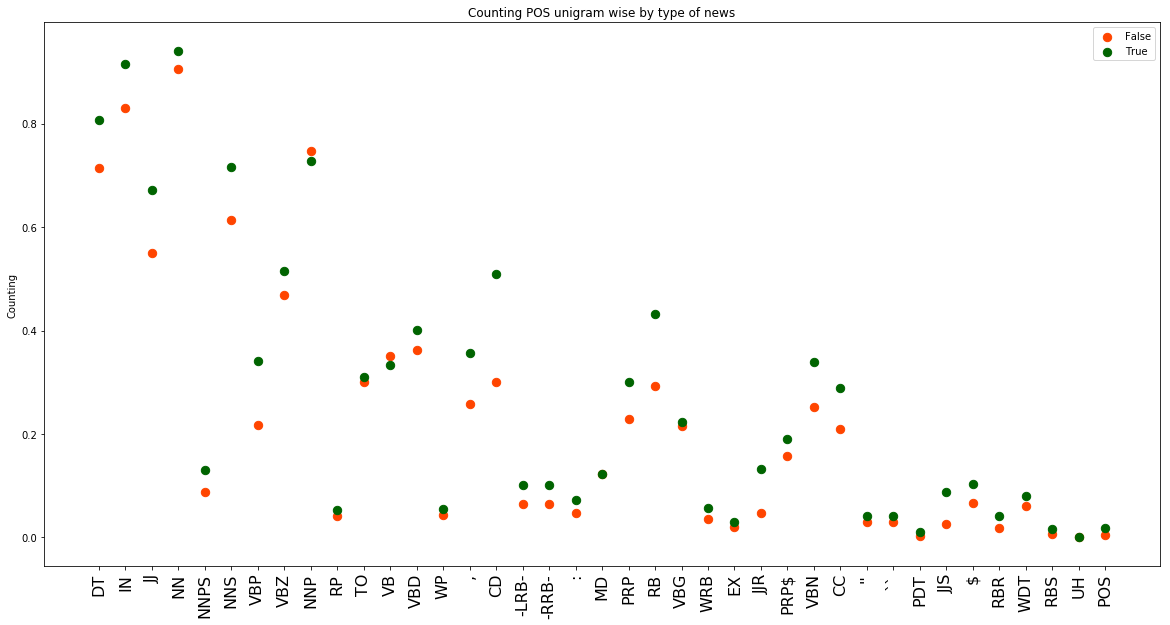

In [467]:
width = 0.2 # the width of the bars
ind = np.arange(len(false_sentences_tags[2:]))
fig, ax = plt.subplots(figsize=(20,10 ))

ax.scatter(ind, (false_pos_count[2:]+pants_fire_count[2:]+barely_true_count[2:])/3, label='False', color='#FF4500',s=70)
ax.scatter(ind, (true_pos_count[2:]+mostly_true_count[2:])/2, label='True',color='darkgreen',s=70)
#ax.scatter(ind, pants_fire_count[2:], label='Pants-Fire',color='#FF0000',s=70)
#ax.scatter(ind, barely_true_count[2:], label='Barely True', color='#0000FF',s=70)
#ax.scatter(ind, half_true_count[2:], label='Half True',color='#8B0000',s=70)
#ax.scatter(ind, mostly_true_count[2:], label='Mostly True', color='#008B8B',s=70)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counting')
ax.set_title('Counting POS unigram wise by type of news')
ax.set_xticks(ind)
ax.set_xticklabels((false_sentences_tags[2:]),fontsize=16)
ax.legend()
plt.xticks(rotation=90)
plt.show()

In [445]:
va_labels = list()
for label in va_dict['label']:
    if label =='false':
        va_labels.append(0)
    elif label == 'true':
        va_labels.append(1)
    elif label == 'pants-fire':
        va_labels.append(2)
    elif label == 'barely-true':
        va_labels.append(3)
    elif label == 'half-true':
        va_labels.append(4)
    elif label == 'mostly-true':
        va_labels.append(5)
va_labels

[3,
 2,
 0,
 4,
 4,
 0,
 1,
 0,
 1,
 4,
 4,
 0,
 4,
 1,
 3,
 4,
 4,
 5,
 3,
 2,
 4,
 2,
 1,
 2,
 4,
 3,
 5,
 2,
 5,
 2,
 0,
 0,
 3,
 3,
 0,
 5,
 1,
 4,
 3,
 4,
 5,
 0,
 1,
 3,
 0,
 1,
 4,
 5,
 5,
 1,
 0,
 1,
 4,
 0,
 5,
 5,
 4,
 0,
 2,
 5,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 0,
 4,
 5,
 3,
 0,
 3,
 1,
 3,
 0,
 5,
 0,
 4,
 1,
 3,
 3,
 3,
 3,
 4,
 3,
 5,
 3,
 2,
 4,
 4,
 2,
 4,
 5,
 0,
 3,
 0,
 3,
 2,
 0,
 3,
 5,
 0,
 5,
 1,
 2,
 0,
 4,
 5,
 1,
 4,
 4,
 1,
 4,
 4,
 2,
 1,
 0,
 0,
 5,
 1,
 0,
 5,
 0,
 1,
 0,
 3,
 4,
 0,
 5,
 3,
 1,
 5,
 1,
 2,
 4,
 1,
 2,
 5,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 3,
 5,
 4,
 3,
 3,
 4,
 2,
 3,
 4,
 4,
 0,
 0,
 1,
 4,
 3,
 2,
 2,
 4,
 0,
 2,
 5,
 5,
 4,
 5,
 4,
 0,
 1,
 0,
 3,
 1,
 5,
 4,
 3,
 1,
 0,
 0,
 0,
 2,
 2,
 0,
 1,
 5,
 1,
 5,
 3,
 0,
 0,
 0,
 2,
 4,
 0,
 5,
 0,
 3,
 3,
 1,
 2,
 3,
 4,
 1,
 1,
 2,
 5,
 4,
 0,
 3,
 0,
 0,
 3,
 3,
 2,
 0,
 2,
 0,
 5,
 5,
 3,
 5,
 5,
 3,
 1,
 4,
 3,
 2,
 0,
 0,
 4,
 2,
 1,
 5,
 0,
 4,
 4,
 1,
 0,
 1,
 5,
 4,
 5,
 4,
 3,
 3,
 2,
 3,


In [443]:
va_dict = util.tsv_to_dict(tsv_file=va_file, columns=['Id','Label','Statement'])

In [566]:
unique_POS = list()
for x in pos_tags:
    for y in x:
        if y not in unique_POS and y not in ['<s>','.']:
            unique_POS.append(y)

In [769]:
uni_exceptions = ['CD','JJR','VB', 'JJS','NNP','IN', 'VBP','NNS','TO']
x_vectors = np.zeros((len(pos_tags),len(unique_POS)))
for index, pos in enumerate(pos_tags):
    for u_index,u_pos in enumerate(unique_POS):
        if u_pos in pos and u_pos not in uni_exceptions:
            x_vectors[index][u_index] = 1 #pos.count(u_pos)
    #x_vectors[index][len(unique_POS)] = len(pos)
x_vectors_va = np.zeros((len(va_pos_tags),len(unique_POS)))
for index, pos in enumerate(va_pos_tags):
    for u_index,u_pos in enumerate(unique_POS):
        if u_pos in pos and u_pos not in uni_exceptions:
            x_vectors_va[index][u_index] = 1 #pos.count(u_pos)
    #x_vectors_va[index][len(unique_POS)] = len(pos)

In [444]:
#va_pos_tags = corenlp.POS_tagging(va_dict['statement'],return_word_tag_pairs=False)

In [717]:
tr_binary_label = list()
for label in tr_dict['label']:
    if label in ['false','pants-fire','barely-true']:
        tr_binary_label.append(1)
    #elif label in ['true','mostly-true']:
    #    tr_binary_label.append(-1)
    else:
        tr_binary_label.append(-1)
    
va_binary_label = list()
for label in va_dict['label']:
    if label in ['false','pants-fire','barely-true']:
        va_binary_label.append(1)
    #elif label in ['true','mostly-true']:
    #    va_binary_label.append(-1)
    else:
        va_binary_label.append(-1)

In [426]:
from sklearn import svm

In [479]:
clf = svm.SVC(C=1.0, kernel='rbf', gamma=1) # decision_function_shape='ovr'
clf.fit(x_vectors, tr_binary_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [480]:
predict = clf.predict(x_vectors_va)

In [481]:
predict

array([ 1, -1, -1, ..., -1, -1, -1])

In [482]:
np.mean(predict == va_binary_label)

0.5475077881619937

In [412]:
len([x for x in va_binary_label if x==-1])

668

In [414]:
616+668

1284

# Bigrams

In [468]:
unique_bigrams = list()
for x in bigrams_pos:
    for y in x:
        if y not in unique_bigrams:
            unique_bigrams.append(y)

In [486]:
len(unique_bigrams)

1153

In [471]:
bigrams_pos_va = corenlp.POS_groupping(va_pos_tags, grams=2)

In [745]:
# Training
exceptions = ['NNP NNP', 'IN DT', 'JJR IN', 'CD NNS', 'DT JJS', 'IN CD','CD NN','JJS NN', 'NNS IN','<s> VBZ','NN IN','TO VB']
x_vectors_bi = np.zeros((len(bigrams_pos),len(unique_bigrams)))
for index, pos in enumerate(bigrams_pos):
    for u_index,u_pos in enumerate(unique_bigrams):
        if u_pos in pos and u_pos not in exceptions:
            x_vectors_bi[index][u_index] = 1 #pos.count(u_pos)
            
# Testing
x_vectors_va_bi = np.zeros((len(bigrams_pos_va),len(unique_bigrams)))
for index, pos in enumerate(bigrams_pos_va):
    for u_index,u_pos in enumerate(unique_bigrams):
        if u_pos in pos and u_pos not in exceptions:
            x_vectors_va_bi[index][u_index] = 1#pos.count(u_pos)

In [502]:
clf = svm.SVC() # decision_function_shape='ovr'
clf.fit(x_vectors_bi[: ,100:200], tr_binary_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [503]:
predict = clf.predict(x_vectors_va_bi[: ,100:200])
predict

array([-1, -1, -1, ..., -1, -1, -1])

In [504]:
np.mean(predict == va_binary_label)

0.5202492211838006

In [808]:
unique_trigrams = list()
for x in trigrams_pos:
    for y in x:
        if y not in unique_trigrams:
            unique_trigrams.append(y)

In [893]:
trigram_pos_va = corenlp.POS_groupping(va_pos_tags, grams=3)
# Training
exceptions = ['NNP NNP NNP','CD NN IN','IN DT JJ','IN DT NN','VBZ NNP NNP','<s> NNP NNP','VBD IN CD','JJR IN CD','NN IN DT','NNS IN DT','DT JJ CD','<s> VBZ NNP' ,'DESDE ACA NO',
             'JJR IN $','TO VB JJ','CD NNS IN','NNP CC NNP','VBP CD NN']
x_vectors_tri = np.zeros((len(trigrams_pos),len(unique_trigrams)))
for index, pos in enumerate(trigrams_pos):
    for u_index,u_pos in enumerate(unique_trigrams):
        if u_pos in pos and u_pos not in exceptions:
            x_vectors_tri[index][u_index] = 1 #pos.count(u_pos)
            
# Testing
x_vectors_va_tri = np.zeros((len(trigram_pos_va),len(unique_trigrams)))
for index, pos in enumerate(trigram_pos_va):
    for u_index,u_pos in enumerate(unique_trigrams):
        if u_pos in pos and u_pos not in exceptions:
            x_vectors_va_tri[index][u_index] = 1 #pos.count(u_pos)

# Decision Tree

In [887]:
from sklearn.tree import DecisionTreeClassifier

In [898]:
dt_clf = DecisionTreeClassifier(max_depth=3, criterion='entropy')

In [899]:
dt_clf.fit(x_vectors_tri, tr_binary_label)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [900]:
predicted = dt_clf.predict(x_vectors_va_tri)
predicted

array([-1, -1, -1, ..., -1, -1, -1])

In [901]:
np.mean(predicted == va_binary_label)

0.5210280373831776

In [892]:
for index,x in enumerate(dt_clf.feature_importances_):
    print('{0}: {1}'.format(unique_trigrams[index],x))
max(dt_clf.feature_importances_)

<s> VBZ DT: 0.0
VBZ DT NNPS: 0.0
DT NNPS VBP: 0.0
NNPS VBP JJ: 0.0
VBP JJ NN: 0.0
JJ NN VBZ: 0.0
NN VBZ JJ: 0.0
VBZ JJ NNS: 0.0
JJ NNS IN: 0.0
NNS IN NN: 0.0
<s> WRB VBD: 0.0
WRB VBD DT: 0.0
VBD DT NN: 0.0
DT NN IN: 0.0
NN IN NN: 0.0
IN NN VB: 0.0
NN VB .: 0.0
VB . <s>: 0.0
. <s> PRP: 0.0
<s> PRP VBD: 0.0
PRP VBD WRB: 0.0
VBD WRB JJ: 0.0
WRB JJ NN: 0.0
JJ NN VBD: 0.0
NN VBD RP: 0.0
VBD RP WDT: 0.0
RP WDT VBD: 0.0
WDT VBD TO: 0.0
VBD TO VB: 0.0
TO VB IN: 0.0
VB IN -LRB-: 0.0
IN -LRB- NNP: 0.0
-LRB- NNP NNP: 0.0
NNP NNP NNP: 0.0
NNP NNP -RRB-: 0.0
NNP -RRB- NNP: 0.0
-RRB- NNP NN: 0.0
<s> NNP NNP: 0.0
NNP NNP VBZ: 0.0
NNP VBZ IN: 0.0
VBZ IN NNP: 0.0
IN NNP NNP: 0.0
NNP NNP ``: 0.0
NNP `` IN: 0.0
`` IN VBG: 0.0
IN VBG TO: 0.0
VBG TO VB: 0.0
TO VB NNP: 0.0
VB NNP NNP: 0.0
NNP NNP DT: 0.0
NNP DT NN: 0.0
NN IN DT: 0.0
IN DT NN: 0.0
NN IN NNP: 0.0
IN NNP .: 0.0
<s> NNP NN: 0.0
NNP NN NN: 0.0
NN NN NN: 0.0
NN NN VBZ: 0.0
VBZ JJ TO: 0.0
JJ TO VB: 0.0
TO VB JJ: 0.0
VB JJ NN: 0.0
JJ NN NN: 0.0
NN 

RB VBG NN: 0.0
VBG NN .: 0.0
JJ -RRB- CD: 0.0
-RRB- CD NNS: 0.0
NNS IN WRB: 0.0
IN WRB NNS: 0.0
WRB NNS VBD: 0.0
VBN CC WRB: 0.0
CC WRB PRP: 0.0
VBD PRP TO: 0.0
PRP TO IN: 0.0
TO IN DT: 0.0
CD NNS VBZ: 0.0
NN IN $: 0.0
CD IN VBN: 0.0
IN VBN NN: 0.0
VBN NN NN: 0.0
VBN DT NNS: 0.0
NNPS VBZ RB: 0.0
NN IN WDT: 0.0
IN WDT NNS: 0.0
WDT NNS CC: 0.0
CC NNS MD: 0.0
VBZ PRP RB: 0.0
VBD PRP MD: 0.0
VB NN VBG: 0.0
CD , NN: 0.0
, NN NN: 0.0
NN NN JJ: 0.0
NN JJ VBZ: 0.0
JJ VBZ VBN: 0.0
VBN RP NN: 0.0
RP NN IN: 0.0
CD NNS DT: 0.0
NNS DT NN: 0.0
VBD , PRP: 0.0
VB JJ RB: 0.0
JJS IN ,: 0.0
IN , IN: 0.0
, IN RB: 0.0
IN RB DT: 0.0
RB DT IN: 0.0
DT IN ,: 0.0
IN , DT: 0.0
, DT -LRB-: 0.0
-LRB- NNP NN: 0.0
-RRB- NNS RB: 0.0
NNS RB VBD: 0.0
IN IN CC: 0.0
IN CC VBD: 0.0
-RRB- VBD JJ: 0.0
CC NN NN: 0.0
MD VB VBD: 0.0
VB VBD TO: 0.0
VBD TO DT: 0.0
, VBD DT: 0.0
VBD DT IN: 0.0
<s> CC WRB: 0.0
VBD PRP ,: 0.0
PRP , NN: 0.0
, NN VBD: 0.0
NNS IN -LRB-: 0.0
NNP -RRB- :: 0.0
-RRB- : NNPS: 0.0
: NNPS CC: 0.0
NNPS CC NNP

JJR IN NNP: 0.0
, NNP CC: 0.0
VBD CD CD: 0.0
NNP CD RB: 0.0
CD , WRB: 0.0
, WRB NNP: 0.0
VBZ DT DT: 0.0
DT DT JJ: 0.0
DT JJ RB: 0.0
JJ RB VBN: 0.0
, IN NNS: 0.0
VBG TO RB: 0.0
RB VB ,: 0.0
VB , CC: 0.0
, CC VBG: 0.0
VBD , NNP: 0.0
, NNP PRP: 0.0
NNP PRP VBP: 0.0
VBP PRP ,: 0.0
PRP , RB: 0.0
, RB PRP: 0.0
RB PRP NN: 0.0
PRP NN IN: 0.0
RB PRP VBP: 0.0
VBN CC CD: 0.0
NN VBZ -LRB-: 0.0
VBZ -LRB- JJ: 0.0
-RRB- NN CC: 0.0
IN NNPS VBG: 0.0
NNPS VBG IN: 0.0
VBG IN CC: 0.0
DT NNP MD: 0.0
NN RB TO: 0.0
<s> VBZ VBN: 0.0
WDT VBZ JJ: 0.0
IN DT CC: 0.0
DT CC CD: 0.0
NN NNP CC: 0.0
NNP CC DT: 0.0
CC DT NNPS: 0.0
NNP VBP RB: 0.0
, PRP$ NNS: 0.0
NN VBP JJR: 0.0
JJR IN WRB: 0.0
IN WRB PRP: 0.0
EX VBZ JJR: 0.0
DT VBZ CD: 0.0
CD NNP NN: 0.0
VBD VBG PRP: 0.0
VBG PRP VBP: 0.0
PRP VBP NNPS: 0.0
VBP NNPS ,: 0.0
VBP NNS ,: 0.0
`` VBD NNS: 0.0
NNS VBG NNS: 0.0
IN PRP$ RB: 0.0
RB VBN JJR: 0.0
JJR IN IN: 0.0
CC NN VBP: 0.0
NN VBP NN: 0.0
VBP NN JJ: 0.0
CC JJ IN: 0.0
RB IN $: 0.0
VBD RB ,: 0.0
DT VBN NNP: 0.0
VBN 

VB RP $: 0.0
NN VBP DT: 0.0
VBZ VBG JJR: 0.0
VBZ RP ,: 0.0
RP , VBG: 0.0
, NNP MD: 0.0
PRP , VBG: 0.0
CD JJ IN: 0.0
NNS VBD PRP$: 0.0
JJS JJ ,: 0.0
DT NNS DT: 0.0
NNS DT VBD: 0.0
DT VBD PRP: 0.0
NNPS , CC: 0.0
POS JJ NNS: 0.0
, IN JJS: 0.0
CD NNS POS: 0.0
`` VBZ PRP: 0.0
NNP RB VB: 0.0
VBD VB NN: 0.0
IN VBG PRP$: 0.0
CD MD RB: 0.0
RB VB JJR: 0.0
IN DT WDT: 0.0
DT WDT VBP: 0.0
VB DT VB: 0.0
RP NNPS NNS: 0.0
VBP IN WDT: 0.0
WDT NN VBN: 0.0
RB IN -LRB-: 0.0
-RRB- CC :: 0.0
CC : DT: 0.0
WDT VBP TO: 0.0
PRP$ NNS RB: 0.0
NNPS , VBG: 0.0
NNP NN VBG: 0.0
VBG RP $: 0.0
PDT DT NNS: 0.0
VBD VBN NNS: 0.0
VBG IN RB: 0.0
JJ CD ,: 0.0
<s> VB DT: 0.0
NNP NNPS VBG: 0.0
VBG NN NNP: 0.0
NNS NNP NN: 0.0
JJ TO :: 0.0
TO : NN: 0.0
CC JJR -LRB-: 0.0
JJR -LRB- NN: 0.0
-RRB- NNS ,: 0.0
<s> VBD VBG: 0.0
VBD `` VBN: 0.0
`` VBN .: 0.0
CC CD DT: 0.0
<s> JJS NNS: 0.0
JJS NNS VBD: 0.0
VBD VB TO: 0.0
VB TO NNS: 0.0
, RB NNPS: 0.0
RB NNPS ,: 0.0
NNPS , WP: 0.0
WP VBP DT: 0.0
NNP VBZ RBR: 0.0
VBZ RBR IN: 0.0
<s> CD JJ:

NNS CD ,: 0.0
PRP VBP $: 0.0
$ CD RB: 0.0
VBD VBN DT: 0.0
VBP -RRB- JJ: 0.0
VBP DT NNPS: 0.0
VBG VBZ VBG: 0.0
. <s> $: 0.0
<s> MD NNP: 0.0
MD NNP VBZ: 0.0
NNP VBG CD: 0.0
RB VB VBZ: 0.0
VB VBZ VB: 0.0
VBZ VB RP: 0.0
, NNP .: 0.0
VB VB TO: 0.0
VBP VBG $: 0.0
NN : ``: 0.0
: `` JJ: 0.0
WDT DT NNS: 0.0
VBN DT JJR: 0.0
VBP JJ PRP: 0.0
: CD CD: 0.0
<s> NNP VB: 0.0
NNP VB VBG: 0.0
NNP -RRB- PRP: 0.0
, CC TO: 0.0
JJ , WRB: 0.0
, NNP VBN: 0.0
NNP VBN RBR: 0.0
RBR NNS ,: 0.0
, VBD RBR: 0.0
NNP CC VBN: 0.0
CC VBN JJR: 0.0
PRP RB .: 0.0
RB VBZ PRP: 0.0
VBN JJ .: 0.0
RBR TO $: 0.0
IN NNS RBR: 0.0
DT VBG RB: 0.0
VBZ IN $: 0.0
$ CD :: 0.0
CD : DT: 0.0
NN MD NN: 0.0
VBP NN VBZ: 0.0
VBZ VBN :: 0.0
VBN : PRP$: 0.0
: PRP$ RB: 0.0
CD JJS -LRB-: 0.0
-RRB- IN PDT: 0.0
CD VBD JJS: 0.0
VBD JJS NN: 0.0
NN RB VBN: 0.0
CD VBP VBP: 0.0
NNP DT $: 0.0
TO NNP CD: 0.0
CC JJ RB: 0.0
CC PRP$ DT: 0.0
WDT NNS PRP: 0.0
, IN CC: 0.0
PRP , TO: 0.0
VBD VB WP: 0.0
VB WP ,: 0.0
WP , IN: 0.0
, IN VBN: 0.0
VBN , MD: 0.0
CC JJR M

VBZ -RRB- DT: 0.0
VBP NN RB: 0.0
RB VBP JJS: 0.0
VBP JJS IN: 0.0
JJR IN NNPS: 0.0
DT , VBP: 0.0
WRB DT -LRB-: 0.0
<s> PRP$ ``: 0.0
PRP$ `` NN: 0.0
-RRB- IN VB: 0.0
IN VB RP: 0.0
NNP CC PDT: 0.0
JJS VBG JJ: 0.0
JJR NNS JJ: 0.0
VBD RB PRP$: 0.0
DT -LRB- DT: 0.0
-RRB- VBZ VBG: 0.0
JJ VB VB: 0.0
VBD `` PRP: 0.0
-RRB- NNP .: 0.0
NNS NNS VBZ: 0.0
NN RB -LRB-: 0.0
RB -LRB- IN: 0.0
IN -RRB- $: 0.0
-RRB- $ CD: 0.0
JJ VBN ,: 0.0
NNS VBP VBP: 0.0
VBN RBR IN: 0.0
VBN PRP VBZ: 0.0
VBP JJ PRP$: 0.0
JJ PRP$ JJ: 0.0
IN RB NNPS: 0.0
PRP$ JJ NNP: 0.0
VBP VBG ,: 0.0
VBG , CC: 0.0
NNP , NNPS: 0.0
<s> WRB VBG: 0.0
WRB VBG NNP: 0.0
VBG NNP JJ: 0.0
NNPS VBZ RP: 0.0
RP IN RB: 0.0
IN RB VB: 0.0
VB , VBG: 0.0
<s> VBN WRB: 0.0
WRB JJ PRP$: 0.0
NN WRB NNPS: 0.0
WRB NNPS NN: 0.0
IN WRB RB: 0.0
WRB RB VBN: 0.0
VBN , PRP$: 0.0
, WP IN: 0.0
WP IN NN: 0.0
NNP WP DT: 0.0
WP DT NNS: 0.0
NNS VBN .: 0.0
NN RBR ,: 0.0
RBR , IN: 0.0
EX VBZ VBN: 0.0
VBD NN -LRB-: 0.0
PRP VBD WP: 0.0
VBD WP VBP: 0.0
NNP VBP NN: 0.0
NNS WDT -L

<s> NN WDT: 0.0
TO IN JJS: 0.0
: CC NN: 0.0
CC NN :: 0.0
NN TO WDT: 0.0
TO WDT NN: 0.0
NNS VBG -LRB-: 0.0
VBZ RBR RB: 0.0
RBR RB DT: 0.0
JJ NNP $: 0.0
VBN TO RBS: 0.0
TO RBS JJ: 0.0
NNPS JJ TO: 0.0
VBD NN :: 0.0
: NNS WDT: 0.0
JJ NNPS RP: 0.0
TO NNP WRB: 0.0
RP TO PRP$: 0.0
NNS -LRB- TO: 0.0
-LRB- TO VB: 0.0
TO VB -RRB-: 0.0
VB -RRB- IN: 0.0
<s> PRP ,: 0.0
NNPS : MD: 0.0
: MD PRP: 0.0
PRP : IN: 0.0
RP IN JJR: 0.0
JJR JJ ,: 0.0
NN JJ PRP$: 0.0
VBZ CD VBD: 0.0
NN WDT JJR: 0.0
WDT JJR NNS: 0.0
PRP$ VBG TO: 0.0
VBG VBD DT: 0.0
NNP -RRB- JJR: 0.0
-RRB- JJR IN: 0.0
JJ TO CC: 0.0
TO CC JJR: 0.0
JJR IN JJS: 0.0
PRP VBP PDT: 0.0
VBP PDT DT: 0.0
NN : WRB: 0.0
WRB DT JJS: 0.0
, WDT DT: 0.0
NN WDT IN: 0.0
CC `` DT: 0.0
`` DT ``: 0.0
IN DT '': 0.0
DT '' VBZ: 0.0
'' VBZ :: 0.0
VBZ : VBD: 0.0
JJ JJ DT: 0.0
DT -RRB- $: 0.0
`` VB CD: 0.0
VBN RB CC: 0.0
NN DT RBS: 0.0
VBD NNP VBN: 0.0
PRP NNP NNPS: 0.0
VBD NNP ``: 0.0
IN IN ,: 0.0
VBG NNS NNPS: 0.0
NNS NNPS CC: 0.0
CC NN DT: 0.0
VBP NNS CC: 0.0
CC WRB V

0.16969307805783213